In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt
import numpy as np
import brown_util as bu

In [5]:
# insert and load the names of the pkl files that you made using the yamlFile to change the parameters
# calculate the mean square displacements for each pkl file
# plot the simulated trajectories of the particles


listofTrajectories= ["crowder_EK_1_crowders.pkl","crowder_EK_4_crowders.pkl","crowder_EK_9_crowders.pkl","crowder_EK_16_crowders.pkl","crowder_EK_25_crowders.pkl","crowder_EK_36_crowders.pkl","crowder_EK_49_crowders.pkl"]
path="tests/"
for trajectory in listofTrajectories:
    ts,xs,ys, nUpdates, nParticles = bu.LoadPKLData(path+trajectory)
    msds= bu.meanSquareDisplacements(xs, ys, nUpdates)
    #print(msds[-1])
    #plotTrajectories(xs, ys)
    #plt.gcf().savefig("testing_NumberofCrowders_particles.png") #how to save each of these individually?

crowder_EK_16_crowders_1.pkl
[0.05461519]
crowder_EK_16_crowders_2.pkl
[0.07496412]
crowder_EK_16_crowders_3.pkl
[0.05230995]
crowder_EK_16_crowders_4.pkl
[0.08102514]
crowder_EK_16_crowders_5.pkl
[0.07626891]
crowder_EK_16_crowders_6.pkl
[0.06891348]
crowder_EK_16_crowders_7.pkl
[0.05319385]
crowder_EK_16_crowders_8.pkl
[0.05539685]
crowder_EK_16_crowders_9.pkl
[0.04585789]
crowder_EK_16_crowders_10.pkl
[0.04512396]
crowder_EK_25_crowders_1.pkl
[0.04521184]
crowder_EK_25_crowders_2.pkl
[0.04005221]
crowder_EK_25_crowders_3.pkl
[0.05365161]
crowder_EK_25_crowders_4.pkl
[0.04494561]
crowder_EK_25_crowders_5.pkl
[0.05877428]
crowder_EK_25_crowders_6.pkl
[0.0685307]
crowder_EK_25_crowders_7.pkl
[0.03713324]
crowder_EK_25_crowders_8.pkl
[0.03950159]
crowder_EK_25_crowders_9.pkl
[0.05850697]
crowder_EK_25_crowders_10.pkl
[0.04757362]


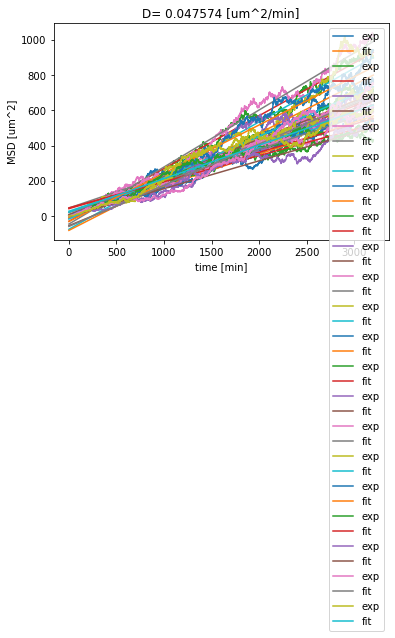

In [7]:
allData=[]
listNames= ["crowder_EK_16_crowders", "crowder_EK_25_crowders"]
listnCrowders=[16,25]
nRuns= 10
path="/home/ekrueger2/source/cellmigration/tests/"

for i, name in enumerate(listNames):
    ds=np.zeros(nRuns)
    for j in range(nRuns):
        namei= name + "_%d"%(j+1) + ".pkl"
        print(namei)
        ts,xs,ys, nUpdates, nParticles = bu.LoadPKLData(path+namei)
        msds= bu.meanSquareDisplacements(xs, ys, nUpdates)
        #bu.PlotStuff(msds,ts)
        texp, msdexp, Dexp = bu.CalcMSD(ts,msds)
        print(Dexp)
        ds[j]=Dexp
    datai={'Dexp_mean':np.mean(ds), 'Dexp_sd':np.std(ds)}
    allData.append(datai)
    plt.gcf().savefig("16_and_25_crowders_10runs.png")

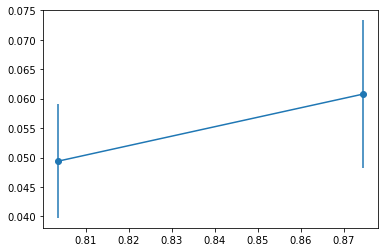

In [9]:
ds=np.zeros(len(datai))
sds=np.zeros(len(datai))

for i, datai in enumerate(allData):
    ds[i]=datai['Dexp_mean']
    sds[i]=datai['Dexp_sd']
#inds=np.arange(len(datai))
inds=bu.CalcVolFrac(np.asarray(listnCrowders))
import matplotlib.pylab as plt
plt.scatter(inds, ds)
plt.errorbar(inds, ds, yerr=sds)
plt.gcf().savefig("16_and_25_crowders_10runs_errorBars.png")